/mnt/c/Users/ldhag/Downloads/COVID-19_Daily_Surveillance_Data_Public.csv

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
from datetime import date, timedelta
%matplotlib inline

In [2]:
df_sa = pd.read_csv('COVID-19_Daily_Surveillance_Data_Public.csv')

In [3]:
df_sa.tail()

,X,Y,objectid,globalid,reporting_date,total_case_daily_change,total_case_cumulative,deaths_daily_change,deaths_cumulative,strac_covid_positive_in_hospita,strac_covid_positive_in_icu,strac_covid_positive_on_ventila,strac_total_ventilators,strac_available_ventilators,strac_total_staffed_beds,strac_available_staffed_beds,count_7_day_moving_avg,change_in_7_day_moving_avg,deaths_under_investigation
578,0.0,0.0,588,330ecda4-374a-463e-8def-0313d1e2ded6,2021/09/13 17:00:00+00,994.0,299488.0,0.0,4035,1043.0,337.0,204.0,804.0,416.0,4151.0,493.0,892.0,7.0,NaN
579,0.0,0.0,589,a883611d-0f02-4430-841d-f7e72e36a6ea,2021/09/14 17:00:00+00,775.0,300263.0,6.0,4145,1016.0,329.0,194.0,804.0,409.0,4200.0,354.0,818.0,-74.0,NaN
580,0.0,0.0,590,066ca74e-93fa-4346-8d31-bdd1e662c611,2021/09/15 17:00:00+00,1157.0,301420.0,4.0,4149,991.0,319.0,210.0,803.0,406.0,4200.0,347.0,839.0,21.0,NaN
581,0.0,0.0,591,d06425b4-097e-4f5a-8d6e-34a8eb1d78de,2021/09/16 17:00:00+00,734.0,302154.0,13.0,4162,960.0,330.0,212.0,805.0,420.0,4366.0,399.0,808.0,-31.0,NaN
582,0.0,0.0,592,de0c2fd8-ea0a-4856-83e5-916fdc049b6b,2021/09/17 17:00:00+00,810.0,302964.0,9.0,4171,894.0,323.0,220.0,817.0,421.0,4309.0,423.0,835.0,27.0,NaN


In [4]:
type(df_sa.loc[:,'reporting_date'][400])

str

In [5]:
df_sa.reporting_date = pd.to_datetime(df_sa.reporting_date)

In [6]:
type(df_sa.loc[:,'reporting_date'][400])

pandas._libs.tslibs.timestamps.Timestamp

In [7]:
df_sa_dtindex = df_sa.set_index('reporting_date')

In [8]:
df_sa.reporting_date[0]

Timestamp('2020-02-12 06:00:00+0000', tz='UTC')

In [9]:
df_newcases = df_sa_dtindex.loc[:,['total_case_daily_change']]

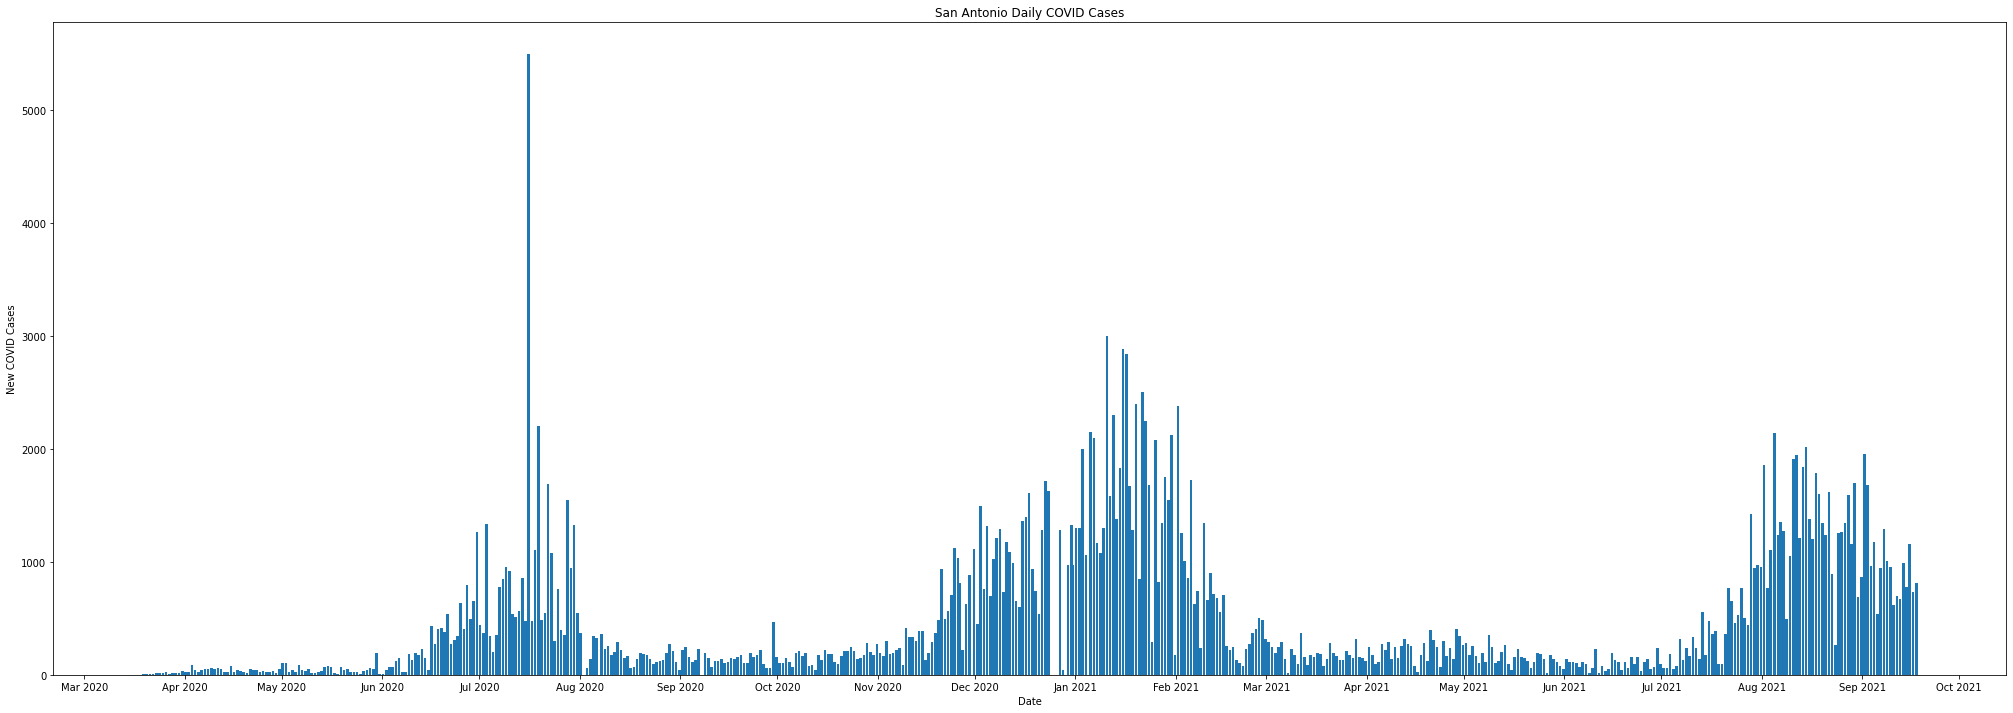

In [10]:
import datetime
import matplotlib.dates as mdates
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(35,12)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
#ax.xaxis.set_minor_locator(months)
plt.title('San Antonio Daily COVID Cases')
plt.xlabel('Date',color='black')
plt.ylabel('New COVID Cases',color='black')
plt.bar(df_newcases.index,df_newcases.total_case_daily_change)
fig.savefig('MetroDailySANew.png')

In [11]:
df_sa_covid_icu = df_sa_dtindex.loc[:,['strac_covid_positive_in_icu']]

In [12]:
df_sa_covid_icu

,strac_covid_positive_in_icu
reporting_date,
2020-02-12 06:00:00+00:00,NaN
2020-02-13 06:00:00+00:00,NaN
2020-02-14 06:00:00+00:00,NaN
2020-02-15 06:00:00+00:00,NaN
2020-02-16 06:00:00+00:00,NaN
...,...
2021-09-13 17:00:00+00:00,337.0
2021-09-14 17:00:00+00:00,329.0
2021-09-15 17:00:00+00:00,319.0


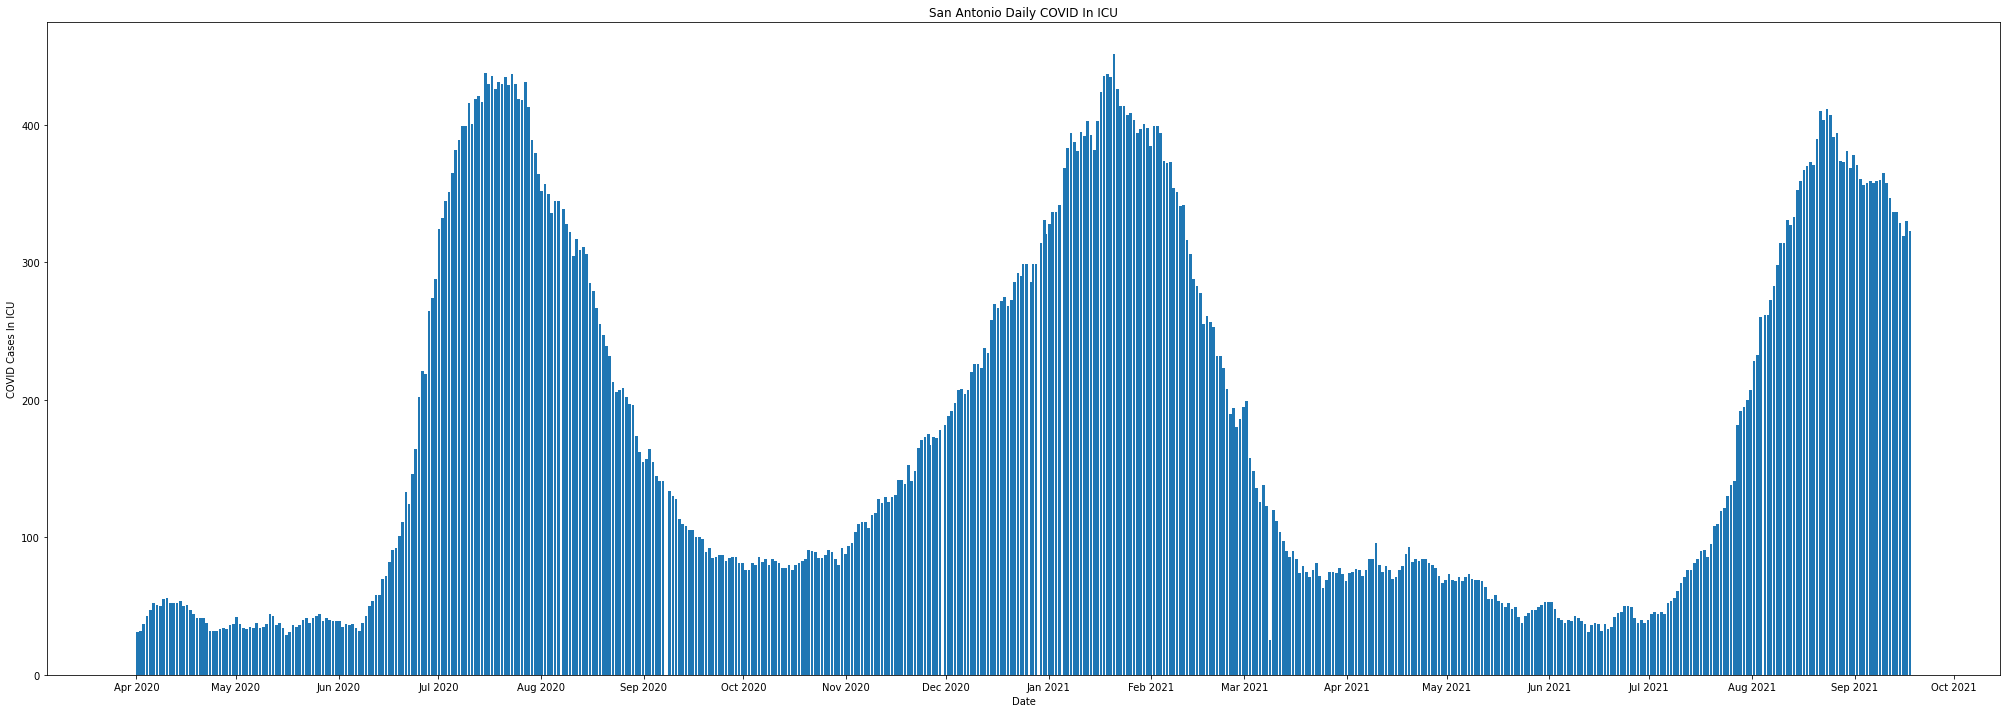

In [13]:
import datetime
import matplotlib.dates as mdates
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(35,12)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
#ax.xaxis.set_minor_locator(months)
plt.title('San Antonio Daily COVID In ICU')
plt.xlabel('Date',color='black')
plt.ylabel('COVID Cases In ICU',color='black')
plt.bar(df_sa_covid_icu.index,df_sa_covid_icu.strac_covid_positive_in_icu)
fig.savefig('MetroICUSANew.png')

In [14]:
df_sa_deaths = df_sa_dtindex.loc[:,['deaths_daily_change']]

In [15]:
df_sa_deaths

,deaths_daily_change
reporting_date,
2020-02-12 06:00:00+00:00,NaN
2020-02-13 06:00:00+00:00,NaN
2020-02-14 06:00:00+00:00,NaN
2020-02-15 06:00:00+00:00,NaN
2020-02-16 06:00:00+00:00,NaN
...,...
2021-09-13 17:00:00+00:00,0.0
2021-09-14 17:00:00+00:00,6.0
2021-09-15 17:00:00+00:00,4.0


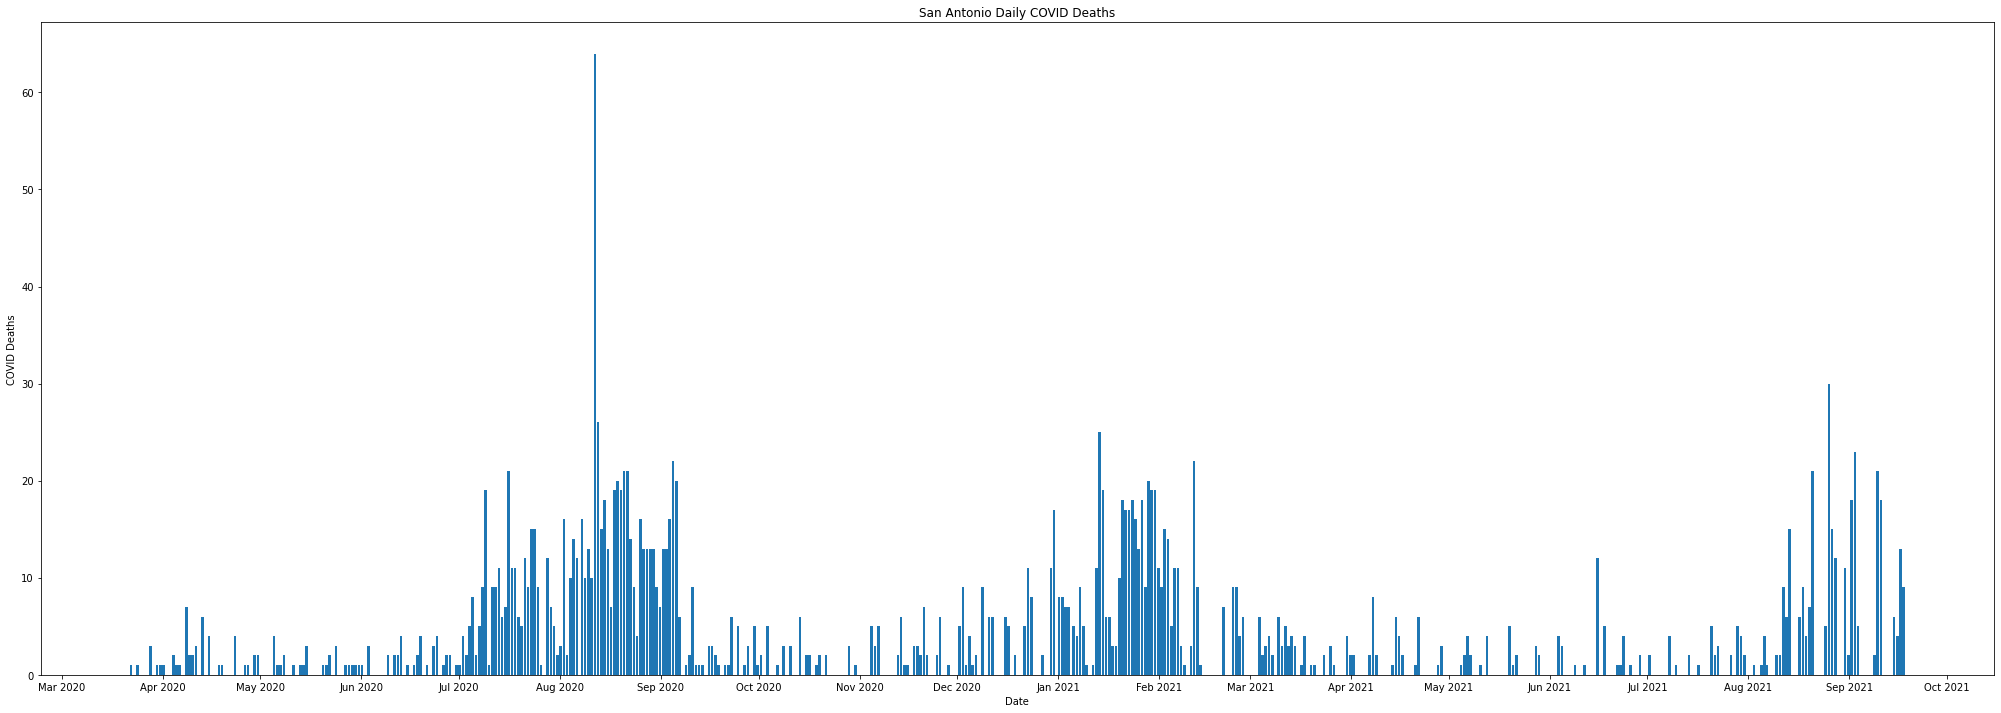

In [16]:
import datetime
import matplotlib.dates as mdates
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(35,12)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
#ax.xaxis.set_minor_locator(months)
plt.title('San Antonio Daily COVID Deaths')
plt.xlabel('Date',color='black')
plt.ylabel('COVID Deaths',color='black')
plt.bar(df_sa_deaths.index,df_sa_deaths.deaths_daily_change)
fig.savefig('MetroDeathsSANew.png')

In [17]:
df_sa_hospital = df_sa_dtindex.loc[:,['strac_covid_positive_in_hospita']]

In [18]:
df_sa_hospital

,strac_covid_positive_in_hospita
reporting_date,
2020-02-12 06:00:00+00:00,NaN
2020-02-13 06:00:00+00:00,NaN
2020-02-14 06:00:00+00:00,NaN
2020-02-15 06:00:00+00:00,NaN
2020-02-16 06:00:00+00:00,NaN
...,...
2021-09-13 17:00:00+00:00,1043.0
2021-09-14 17:00:00+00:00,1016.0
2021-09-15 17:00:00+00:00,991.0


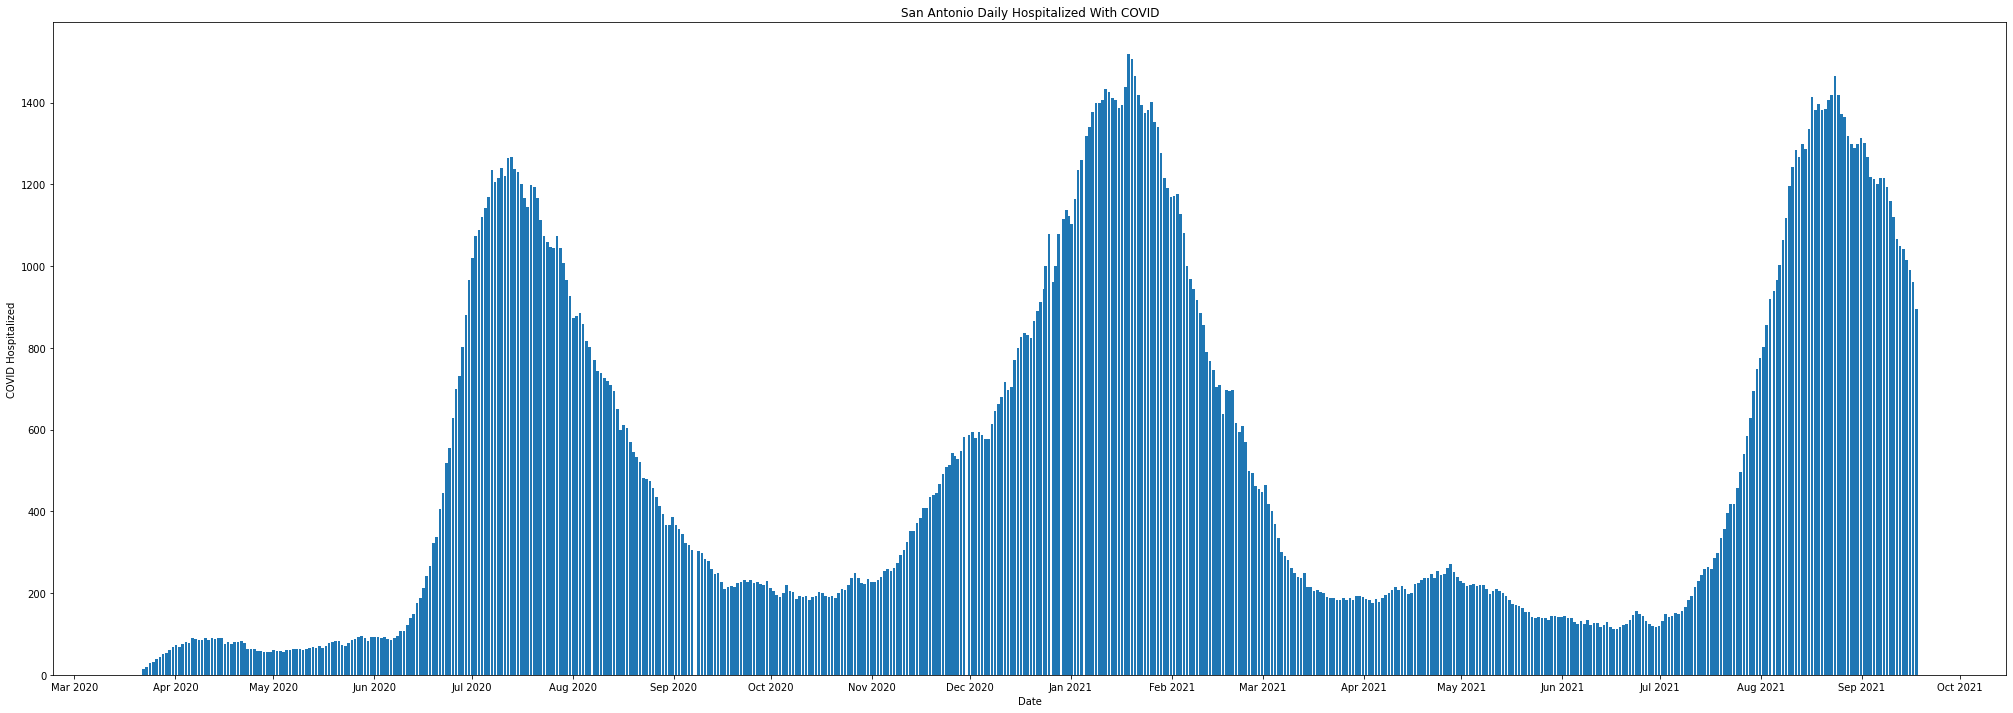

In [19]:
import datetime
import matplotlib.dates as mdates
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(35,12)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
#ax.xaxis.set_minor_locator(months)
plt.title('San Antonio Daily Hospitalized With COVID')
plt.xlabel('Date',color='black')
plt.ylabel('COVID Hospitalized',color='black')
plt.bar(df_sa_hospital.index,df_sa_hospital.strac_covid_positive_in_hospita)
fig.savefig('MetroHospitalSANew.png')

In [20]:
df_sa_availbeds = df_sa_dtindex.loc[:,['strac_available_staffed_beds']]

In [21]:
df_sa_availbeds

,strac_available_staffed_beds
reporting_date,
2020-02-12 06:00:00+00:00,NaN
2020-02-13 06:00:00+00:00,NaN
2020-02-14 06:00:00+00:00,NaN
2020-02-15 06:00:00+00:00,NaN
2020-02-16 06:00:00+00:00,NaN
...,...
2021-09-13 17:00:00+00:00,493.0
2021-09-14 17:00:00+00:00,354.0
2021-09-15 17:00:00+00:00,347.0


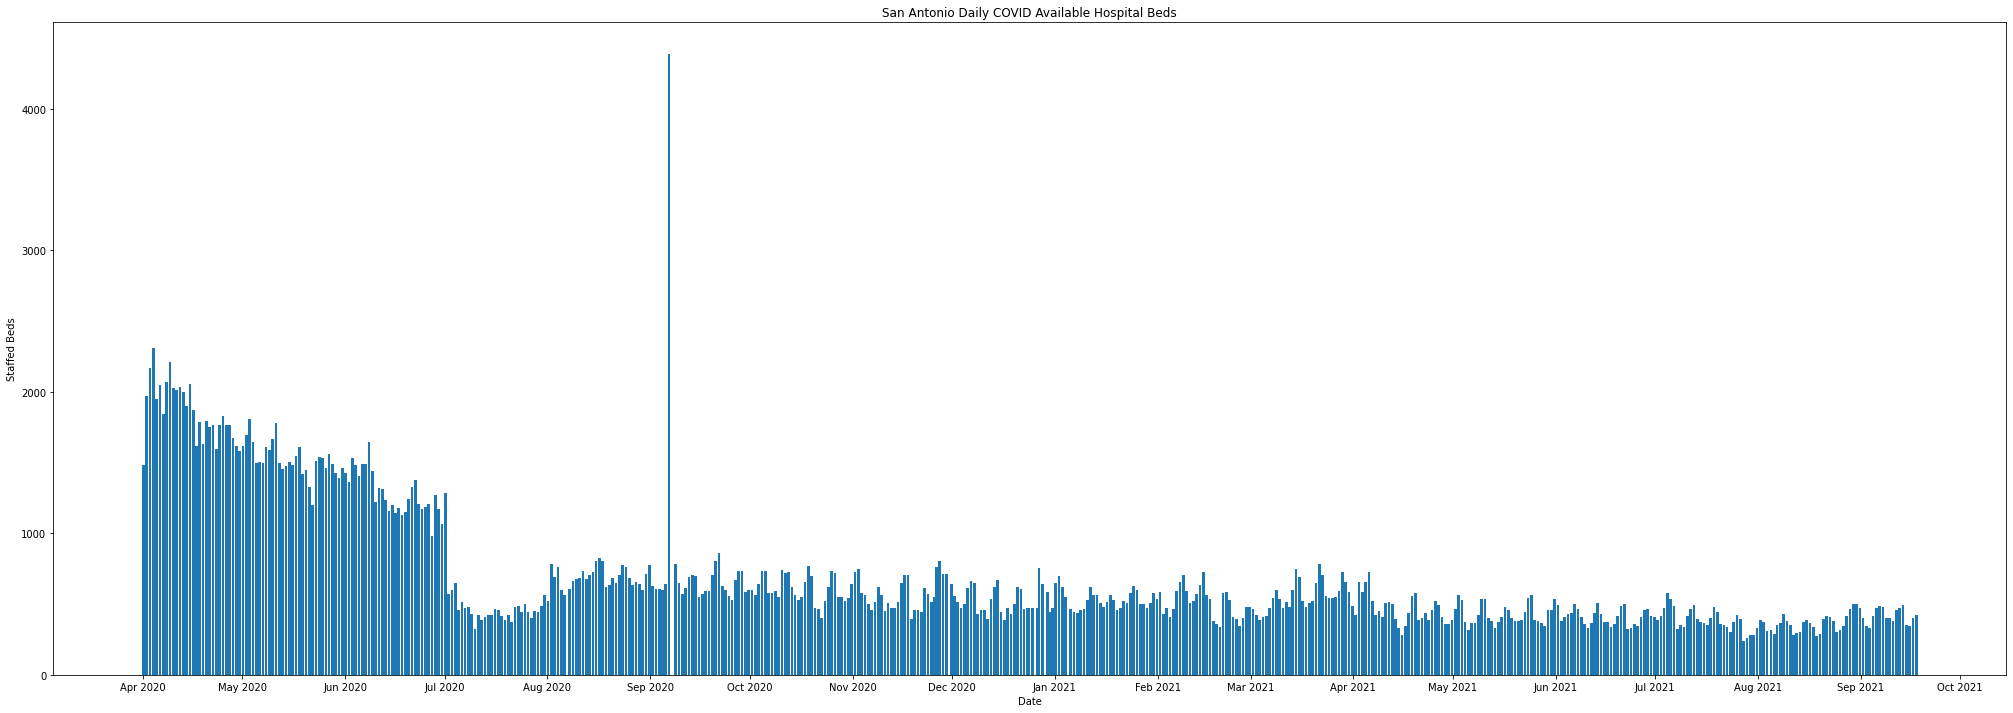

In [22]:
import datetime
import matplotlib.dates as mdates
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(35,12)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
#ax.xaxis.set_minor_locator(months)
plt.title('San Antonio Daily COVID Available Hospital Beds')
plt.xlabel('Date',color='black')
plt.ylabel('Staffed Beds',color='black')
plt.bar(df_sa_availbeds.index,df_sa_availbeds.strac_available_staffed_beds)
fig.savefig('MetroAvailBedsSANew.png')